<h1>Usage example for EDeN wrapper</h1>

In [12]:
%matplotlib inline
from eden_wrapper import EdenWrapper
from utilities import Weblogo

In [13]:
train = [
    ('ce1cg', 
     'TAATGTTTGTGCTGGTTTTTGTGGCATCGGGCGAGAATAGCGCGTGGTGTGAAAGACTGTTTTTTTGATCGTTTTCACAAAAATGGAAGTCCACAGTCTTGACAG'),
    ('ara', 
     'GACAAAAACGCGTAACAAAAGTGTCTATAATCACGGCAGAAAAGTCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCATAGCATTTTTATCCATAAG'),
    ('bglr1', 
     'ACAAATCCCAATAACTTAATTATTGGGATTTGTTATATATAACTTTATAAATTCCTAAAATTACACAAAGTTAATAACTGTGAGCATGGTCATATTTTTATCAAT'),
    ('crp', 
     'CACAAAGCGAAAGCTATGCTAAAACAGTCAGGATGCTACAGTAATACATTGATGTACTGCATGTATGCAAAGGACGTCACATTACCGTGCAGTACAGTTGATAGC'),
    ('cya', 
     'ACGGTGCTACACTTGTATGTAGCGCATCTTTCTTTACGGTCAATCAGCAAGGTGTTAAATTGATCACGTTTTAGACCATTTTTTCGTCGTGAAACTAAAAAAACC'),
    ('deop2', 
     'AGTGAATTATTTGAACCAGATCGCATTACAGTGATGCAAACTTGTAAGTAGATTTCCTTAATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA'),
    ('gale', 
     'GCGCATAAAAAACGGCTAAATTCTTGTGTAAACGATTCCACTAATTTATTCCATGTCACACTTTTCGCATCTTTGTTATGCTATGGTTATTTCATACCATAAGCC'),
    ('ilv', 
     'GCTCCGGCGGGGTTTTTTGTTATCTGCAATTCAGTACAAAACGTGATCAACCCCTCAATTTTCCCTTTGCTGAAAAATTTTCCATTGTCTCCCCTGTAAAGCTGT'),
    ('lac', 
     'AACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCAC'),
    ('male', 
     'ACATTACCGCCAATTCTGTAACAGAGATCACACAAAGCGACGGTGGGGCGTAGGGGCAAGGAGGATGGAAAGAGGTTGCCGTATAAAGAAACTAGAGTCCGTTTA'),
    ('malk', 
     'GGAGGAGGCGGGAGGATGAGAACACGGCTTCTGTGAACTAAACCGAGGTCATGTAAGGAATTTCGTGATGTTGCTTGCAAAAATCGTGGCGATTTTATGTGCGCA'),
    ('malt', 
     'GATCAGCGTCGTTTTAGGTGAGTTGTTAATAAAGATTTGGAATTGTGACACAGTGCAAATTCAGACACATAAAAAAACGTCATCGCTTGCATTAGAAAGGTTTCT'),
    ('ompa', 
     'GCTGACAAAAAAGATTAAACATACCTTATACAAGACTTTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTCAACTACGTTGTAGACTTTACATCGCC'),
    ('tnaa', 
     'TTTTTTAAACATTAAAATTCTTACGTAATTTATAATCTTTAAAAAAAGCATTTAATATTGCTCCCCGAACGATTGTGATTCGATTCACATTTAAACAATTTCAGA'),
    ('uxu1', 
     'CCCATGAGAGTGAAATTGTTGTGATGTGGTTAACCCAATTAGAATTCGGGATTGACATGTCTTACCAAAAGGTAGAACTTATACGCCATCTCATCCGATGCAAGC'),
    ('pbr322', 
     'CTGGCTTAACTATGCGGCATCAGAGCAGATTGTACTGAGAGTGCACCATATGCGGTGTGAAATACCGCACAGATGCGTAAGGAGAAAATACCGCATCAGGCGCTC'),
    ('trn9cat', 
     'CTGTGACGGAAGATCACTTCGCAGAATAAATAAATCCTGGTGTCCCTGTTGATACCGGGAAGCCCTGGGCCAACTTTTGGCGAAAATGAGACGTTGATCGGCACG'),
    ('tdc', 
     'GATTTTTATACTTTAACTTGTTGATATTTAAAGGTATTTAATTGTAATAACGATACTCTGGAAAGTATTGAAAGTTAATTTGTGAGTGGTCGCACATATCCTGTT'),
    ]

# test data consists of first 9 sequences of training data
test = train[:9]

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

wl=Weblogo(color_scheme = 'classic')

ew = EdenWrapper(alphabet='dna',
                # distance=10, 
                # radius=5, 
                clustering_algorithm=km,
                threshold=0,
                
                weblogo_obj=wl)

ew.fit(seqs=train)

In [15]:
for i in ew.original_motives_list:
    for j in i:
        print j
    print

(1, 'CTTTTTTTTC')
(1, 'ATATTTTTA')
(1, 'ATTTTTATAC')
(1, 'GTTTTTGTG')
(1, 'GTTTTTTGT')
(1, 'GTTTTTTTG')

(2, 'GTCACACTT')
(1, 'TTTACACTTT')
(1, 'TCACACTTTT')
(1, 'ATTACACAAA')
(1, 'ATTTCATAC')
(1, 'GTCACATTAC')
(1, 'GCATAAAAAA')

(1, 'TGATGTTGC')
(1, 'AGTACAGTTG')
(1, 'ATTGTTGTGA')
(1, 'GTGTGTTGC')
(1, 'GGATTTGTT')



In [16]:
for i in ew.aligned_motives_list:
    for j in i:
        print j
    print 

(1, 'CTTTTTTTTC')
(1, 'ATATTTTTA-')
(1, 'ATTTTTATAC')
(1, 'GTTTTTGTG-')
(1, 'GTTTTTTGT-')
(1, 'GTTTTTTTG-')

(2, '--GTCACACTT--')
(1, '--TTTACACTTT-')
(1, '---TCACACTTTT')
(1, '--ATTACACAAA-')
(1, 'ATTTCATAC----')
(1, '--GTCACATTAC-')
(1, '---GCATAAAAAA')

(1, '--TGATGTTGC--')
(1, 'AGTACAGTTG---')
(1, '---ATTGTTGTGA')
(1, '--GTGTGTTGC--')
(1, 'GGATTTGTT----')



In [17]:
for i in ew.motives_list:
    for j in i:
        print j
    print

(1, 'CTTTTTTTT')
(1, 'ATATTTTTA')
(1, 'ATTTTTATA')
(1, 'GTTTTTGTG')
(1, 'GTTTTTTGT')
(1, 'GTTTTTTTG')

(2, 'TCACACTT-')
(1, 'TTACACTTT')
(1, 'TCACACTTT')
(1, 'TTACACAAA')
(1, 'TCATACAAA')
(1, 'TCACATTAC')
(1, 'GCATAAAAA')

(1, 'TGATGTTGC')
(1, 'TACAGTTGC')
(1, 'GATTGTTGT')
(1, 'GTGTGTTGC')
(1, 'ATTTGTT-C')



In [18]:
predictions = ew.predict(input_seqs=test, return_list=True)
for p in predictions: print p

[]
[]
[]
[]
[]
[]
[1]
[]
[]


In [19]:
predictions = ew.predict(input_seqs=test, return_list=False)
for p in predictions: print p

0
0
0
0
0
0
1
0
0


In [20]:
match = ew.transform(input_seqs=test, return_match=True)
for m in match: print m

[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [(53, 66, 1.8206399183870232e-05)], []]
[[], [], []]
[[], [], []]


In [21]:
match = ew.transform(input_seqs=test, return_match=False)
for m in match: print m

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 1, 0]
[0, 0, 0]
[0, 0, 0]


In [22]:
ew2= EdenWrapper(alphabet='dna',
                   # distance=10, 
                   # radius=5, 
                   clustering_algorithm=km)
predictions = ew2.fit_predict(seqs=train)
for p in predictions: print p

3
0
2
1
1
0
2
0
2
0
0
0
3
3
0
0
0
3


In [23]:
matches = ew2.fit_transform(seqs=train)
for m in matches: print m

[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 1]
[1, 0, 0]


In [24]:
#printing motives as lists
for motif in ew.motives_list:
    for m in motif:
        print m
    print

(1, 'CTTTTTTTT')
(1, 'ATATTTTTA')
(1, 'ATTTTTATA')
(1, 'GTTTTTGTG')
(1, 'GTTTTTTGT')
(1, 'GTTTTTTTG')

(2, 'TCACACTT-')
(1, 'TTACACTTT')
(1, 'TCACACTTT')
(1, 'TTACACAAA')
(1, 'TCATACAAA')
(1, 'TCACATTAC')
(1, 'GCATAAAAA')

(1, 'TGATGTTGC')
(1, 'TACAGTTGC')
(1, 'GATTGTTGT')
(1, 'GTGTGTTGC')
(1, 'ATTTGTT-C')



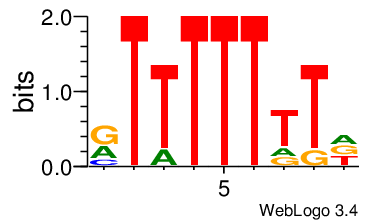

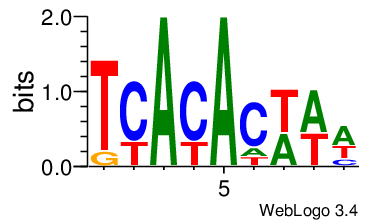

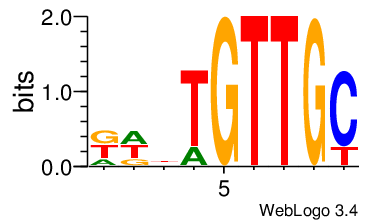

In [25]:
ew.display_logo(do_alignment=False)

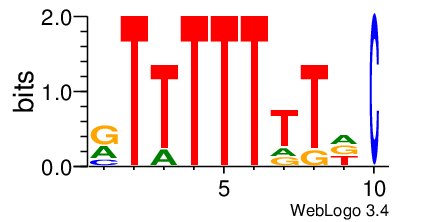

In [26]:
ew.display_logo(motif_num=1)

In [27]:
ew.align_motives()    #MSA with Muscle
motives1=ew.aligned_motives_list
for m in motives1:
    for i in m:
        print i
    print

(1, 'CTTTTTTTT')
(1, 'ATATTTTTA')
(1, 'ATTTTTATA')
(1, 'GTTTTTGTG')
(1, 'GTTTTTTGT')
(1, 'GTTTTTTTG')

(2, 'TCACACTT-')
(1, 'TTACACTTT')
(1, 'TCACACTTT')
(1, 'TTACACAAA')
(1, 'TCATACAAA')
(1, 'TCACATTAC')
(1, 'GCATAAAAA')

(1, 'TGATGTTGC')
(1, 'TACAGTTGC')
(1, 'GATTGTTGT')
(1, 'GTGTGTTGC')
(1, 'ATTTGTTC-')



In [28]:
ew.display()

        0      1      2      3      4      5      6      7      8      9
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.67
A:   0.33   0.00   0.17   0.00   0.00   0.00   0.17   0.00   0.33   0.00
C:   0.17   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.33
G:   0.50   0.00   0.00   0.00   0.00   0.00   0.17   0.17   0.33   0.00
T:   0.00   1.00   0.83   1.00   1.00   1.00   0.67   0.83   0.33   0.00

        0      1      2      3      4      5      6      7      8      9     10     11     12
-:   0.86   0.86   0.29   0.00   0.00   0.00   0.00   0.00   0.00   0.14   0.14   0.29   0.71
A:   0.14   0.00   0.14   0.00   0.00   1.00   0.00   1.00   0.14   0.29   0.43   0.29   0.14
C:   0.00   0.00   0.00   0.00   0.71   0.00   0.71   0.00   0.71   0.00   0.00   0.14   0.00
G:   0.00   0.00   0.29   0.14   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
T:   0.00   0.14   0.29   0.86   0.29   0.00   0.29   0.00   0.14   0.57   0.43   0.29   0.

In [29]:
ew.display(motif_num=3)

        0      1      2      3      4      5      6      7      8      9     10     11     12
-:   0.60   0.60   0.20   0.00   0.00   0.00   0.00   0.00   0.00   0.20   0.40   0.80   0.80
A:   0.20   0.00   0.20   0.40   0.20   0.20   0.00   0.00   0.00   0.00   0.00   0.00   0.20
C:   0.00   0.00   0.00   0.00   0.20   0.00   0.00   0.00   0.00   0.00   0.40   0.00   0.00
G:   0.20   0.40   0.20   0.20   0.20   0.00   1.00   0.00   0.00   0.80   0.00   0.20   0.00
T:   0.00   0.00   0.40   0.40   0.40   0.80   0.00   1.00   1.00   0.00   0.20   0.00   0.00



In [30]:
# Score a test sequence using probability score
test_seq = 'AAAAAAAAAAAA' * 10
seq_score = ew.score(motif_num=2, seq=test_seq)
print seq_score

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
%%time
# Score a test sequence using Hidden Markov Model score
mm_score = ew.score_mm(motif_num=1, seq=test_seq)
print 'Motif instances used for scoring:'
for m in ew.original_motives_list[0]:
    print m[1]
print
print 'Score:'
print mm_score

Motif instances used for scoring:
TTTACACTTT
ATCACACAAA
TCACATTACC
ATTACACAAA
TCACACTTTT

Score:
[-36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -36.67888427718702, -3